# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
train_dataset = "https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv"
test_dataset = "https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/test.csv"

In [3]:
df = pd.read_csv(train_dataset)

# Dataset Overview

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- `Pclass` (Passenger Class)
    - `1` = 1st class (Upper class, most expensive)
    - `2` = 2nd class (Middle class)
    - `3` = 3rd class (Lower class, cheapest)
- `SibSp` (Siblings/Spouses Aboard)
    - `0` (traveling alone)
    - `1` (traveling with a sibling/spouse)
- `Parch` (Parents/Children Aboard)
    - `0` (traveling alone)
    - `1` (traveling with a sibling/spouse)
- `Fare` Price of the ticket
- `Embarked` The port from which the passenger boarded the Titanic.
    - `C` Cherbourg
    - `Q` Queenstown
    - `S` Southampton 

In [5]:
# Summary Statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Missing Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Categorical Column

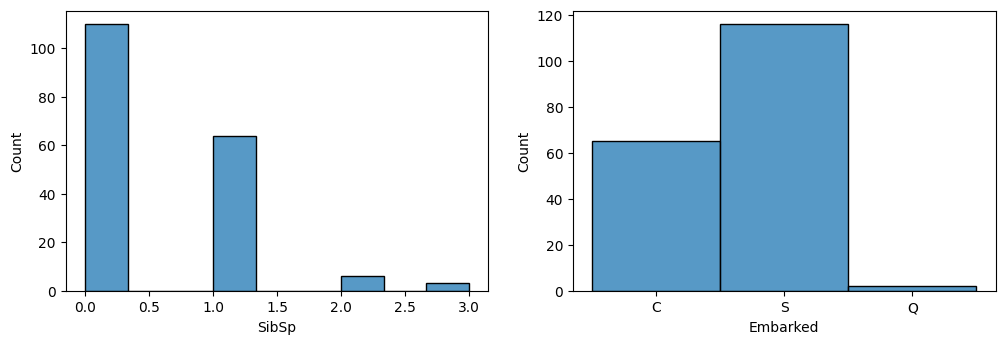

In [10]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['SibSp'])

plt.subplot(2, 2, 2)
sns.histplot(df['Embarked'])

plt.show()

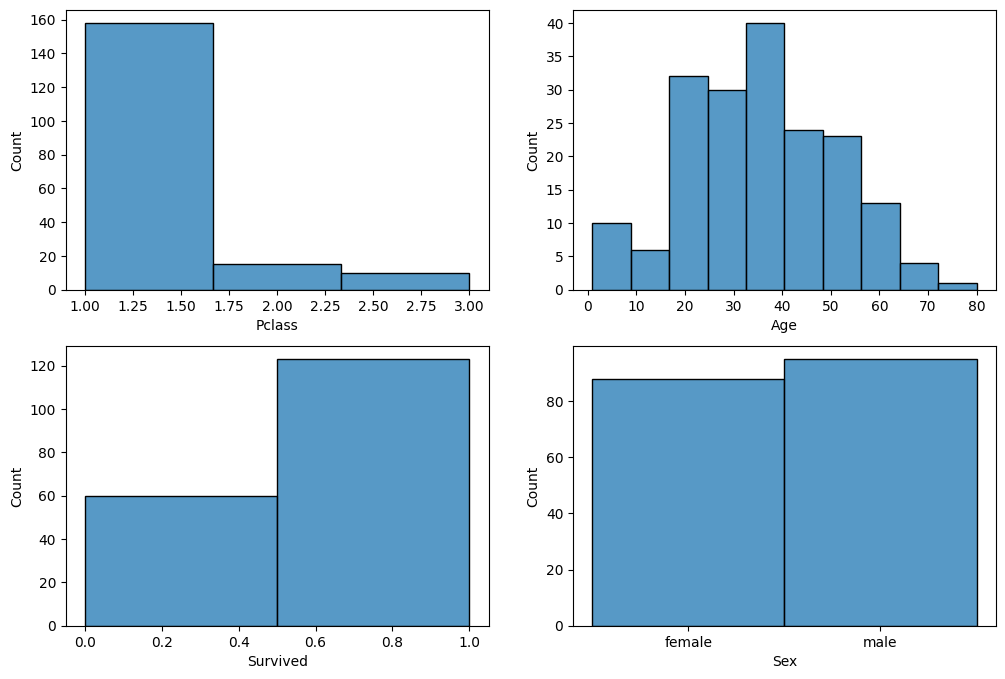

In [11]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['Pclass'], bins=3)

plt.subplot(2, 2, 2)
sns.histplot(df['Age'])

plt.subplot(2, 2, 3)
sns.histplot(df['Survived'], bins=2)

plt.subplot(2, 2, 4)
sns.histplot(df['Sex'])

plt.show()

# Survival Analysis

In [12]:
# survival rate for different passenger classes
df[['Pclass', 'Survived']].value_counts()

Pclass  Survived
1       1           106
        0            52
2       1            12
3       0             5
        1             5
2       0             3
Name: count, dtype: int64

In [13]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.670886
2    0.800000
3    0.500000
Name: Survived, dtype: float64

In [14]:
# survival rate by gender
df.groupby('Sex')['Survived'].mean()

Sex
female    0.931818
male      0.431579
Name: Survived, dtype: float64

In [15]:
# survival rate by age group
bins = [0, 12, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-12', '13-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

survival_rate_by_age_group = df.groupby('AgeGroup')['Survived'].mean()
print(survival_rate_by_age_group)

AgeGroup
0-12      0.818182
13-18     0.916667
19-30     0.717391
31-40     0.755102
41-50     0.515152
51-60     0.636364
61-70     0.125000
71-80     0.500000
81-90          NaN
91-100         NaN
Name: Survived, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_9716\575538515.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age_group = df.groupby('AgeGroup')['Survived'].mean()


In [16]:
# survival rate based on family member
df.groupby(df['SibSp']+df['Parch'])['Survived'].mean()

0    0.607595
1    0.721311
2    0.714286
3    0.777778
4    1.000000
5    0.500000
Name: Survived, dtype: float64

In [17]:
#average fare per class
df.groupby("Pclass")["Fare"].mean()

Pclass
1    88.683228
2    18.444447
3    11.027500
Name: Fare, dtype: float64

In [18]:
# Compare average fare for survivors vs. non-survivors
df[df["Survived"] == 1]["Fare"].mean()

85.82110650406504

In [19]:
df[df["Survived"] == 0]["Fare"].mean()

64.04826166666666

In [20]:
# most common embarkation port
df['Embarked'].value_counts()

Embarked
S    116
C     65
Q      2
Name: count, dtype: int64

In [21]:
df.groupby('Embarked')['Survived'].value_counts()

Embarked  Survived
C         1           48
          0           17
Q         0            1
          1            1
S         1           74
          0           42
Name: count, dtype: int64

In [22]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df.groupby("FamilySize")["Survived"].mean()

FamilySize
1    0.607595
2    0.721311
3    0.714286
4    0.777778
5    1.000000
6    0.500000
Name: Survived, dtype: float64

# Insights
1. **Age Impact Survival?:** Younger passengers (especially children) had a higher chance of survival. This is likely due to the "women and children first" policy during the Titanic disaster.
2. **Most Common Embarkation Port:** The most common embarkation port is Southampton (S), where the majority of passengers boarded. This makes sense because the Titanic sailed from Southampton.
    - Cherbourg (C) had fewer passengers, primarily wealthy 1st-class passengers.
    - Queenstown (Q) had the least number of passengers, mainly from 3rd class.
3. **Survival Rate by Family Size:** Passengers traveling alone or in very small families (1-3 members) had a lower chance of survival compared to those traveling in slightly larger groups.
    - The optimal family size for survival was often around 2-4 members.
    - Larger families (6+ members) typically had lower survival rates, possibly because families were split up or struggled to board lifeboats together.
4. **Survival Rate vs. Fare:**  Higher-paying passengers (especially those in 1st class) had better access to lifeboats and therefore a higher chance of survival. The fare likely reflects both the class and better access to lifeboats.

# Correlation Heatmap

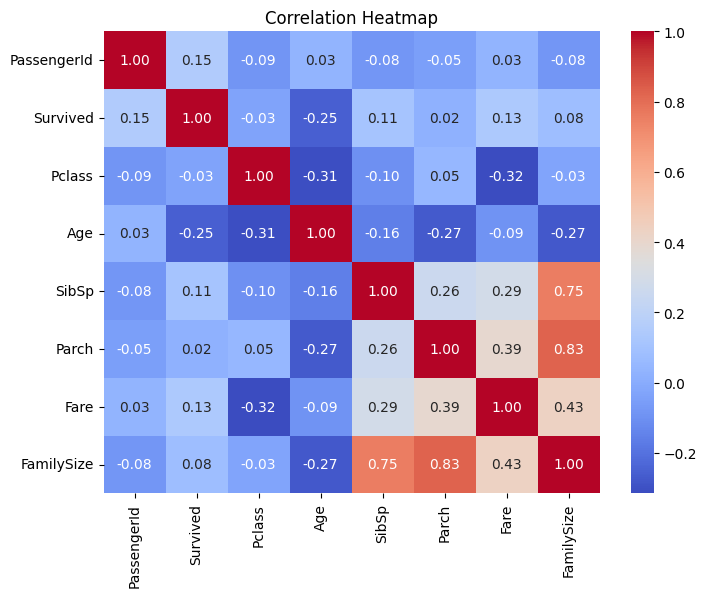

In [23]:
plt.figure(figsize=(8, 6))
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Prediction

In [31]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [32]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})  # Convert 'Sex' to 0 & 1
X['Embarked'] = X['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # Convert 'Embarked' categories to numbers

C:\Users\USER\AppData\Local\Temp\ipykernel_9716\2640725643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})  # Convert 'Sex' to 0 & 1
C:\Users\USER\AppData\Local\Temp\ipykernel_9716\2640725643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = X['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # Convert 'Embarked' categories to numbers


In [34]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,38.0,1,0,71.2833,0
3,1,1,35.0,1,0,53.1000,2
6,1,0,54.0,0,0,51.8625,2
10,3,1,4.0,1,1,16.7000,2
11,1,1,58.0,0,0,26.5500,2


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.74      0.87      0.80        23

    accuracy                           0.73        37
   macro avg       0.72      0.68      0.69        37
weighted avg       0.73      0.73      0.72        37

Accuracy Score: 0.7297297297297297
Confusion Matrix:
 [[ 7  7]
 [ 3 20]]
